# Studies of data reuse: Simple and complex spikes of cerebellar Purkinje cells and simultaneously tracked whisker voluntary movement (v1)

In this notebook we will look more closely at the EBRAINS dataset "[Simple and complex spikes of cerebellar Purkinje cells and simultaneously tracked whisker voluntary movement (v1)](https://search.kg.ebrains.eu/?category=Dataset&modality[0]=electrophysiology&dataAccessibility[0]=free%20access#ebbe3627-7411-4e8f-966f-3f12a050b5e4)", contributed by Vincenzo Romano from the Department of Neuroscience, Erasmus MC, Rotterdam, the Netherlands.

As we can see from the dataset description,

This dataset consists of 233 single units of Purkinje cells recorded extracellularly during freely whisking of awake, head-fixed restrained mice. The whisker movement, monitored with a camera, was quantified and averaged across whiskers, and is made available as a time series. Spike-sorting of Purkinje cell raw traces was performed using customized software, named SpikeTrain, and the result is given as spike times for each cell. Using this dataset, many cerebellar scientists can test their hypotheses on cerebellar functioning. Therefore this dataset allows revealing how the Purkinje cells affect movement and vice versa.

More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/?category=Dataset&modality[0]=electrophysiology&dataAccessibility[0]=free%20access#ebbe3627-7411-4e8f-966f-3f12a050b5e4).

This dataset forms part of the results reported in Romano, V., Zhai, P., van der Horst, A., Mazza, R., Jacobs, T., Bauer, S., Wang, X., White, J. J., & De Zeeuw, C. I. (2022). Olivocerebellar control of movement symmetry. *Current Biology*, **32**(3), 654-670.e4. https://doi.org/10.1016/j.cub.2021.12.020

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article.

### Notes: 
From the data descriptor:
233_Purkinje_cells_Vincenzo_Romano.mat
└-- data [1x233 struct]
└-- name [unique code of each cell indicating the date, the epoch of the recording (block), and the
number, e.g. 210511_Block-3_Ch6_Epoc1of1.spd]
└-- cs [complex spike timing]
└-- ss [simple spike timing]
└-- combined_unique_whisker_tracks1/
└-- angle_vector [whisker positions – 1x226018 double]
└-- time_vector [time points – 1x226018 double]


43 PCs recorded during eupneic respiration
impossible to know which cells were recorded under which conditions
also most graphs are considering respirations as a factor: no idea when inspiration or expiration is so impossible to reproduce graphs
also mentions decreasing and increasing PCs ??
lots of graphs about The raw respiratory signals around the air puff; Raster plots showing respiratory cycles
Representative PC recordings showing either suppressed (A) or increased (B) simple spike firing upon whisker pad air puff stimulation 
No idea when the whisker pad air puff stimulation occurs
for each recorded PC during whisker movement without (left) and with (middle) CSs no mention of movement anywhere in data

In [1]:
!pip install mat73
import mat73

In [2]:
data= mat73.loadmat('233_Purkinje_cells_Vincenzo_Romano.mat')
df=data['data']

In [3]:
data

{'data': {'combined_unique_whisker_tracks1': [{'angle_vector': array([ 0.43953621, -0.06863536, -0.07455564, ...,  1.09509931,
            1.03202836,  0.41008696]),
    'time_vector': array([244287.642073, 244288.642073, 244289.642073, ..., 470302.642073,
           470303.642073, 470304.642073])},
   {'NEW_angle_fanning': array([0.        , 0.        , 0.        , ..., 4.31316368, 4.19737343,
           4.08158318]),
    'NEW_angle_vector': array([0.        , 0.        , 0.        , ..., 0.96792214, 0.76839864,
           0.56887514]),
    'NEW_time_vector': array([ 12882.642073,  12883.642073,  12884.642073, ..., 684539.642073,
           684540.642073, 684541.642073]),
    'NEW_x1pos_fanning': array([0.        , 0.        , 0.        , ..., 9.48908384, 9.50140693,
           9.51373001]),
    'NEW_x1pos_vector': array([ 0.        ,  0.        ,  0.        , ..., -1.46831253,
           -1.57469311, -1.68107369]),
    'angle_fanning': array([0.        , 0.        , 0.        , ..., 

In [4]:
data.keys()

dict_keys(['data'])

In [5]:
df=data['data']

In [6]:
df

{'combined_unique_whisker_tracks1': [{'angle_vector': array([ 0.43953621, -0.06863536, -0.07455564, ...,  1.09509931,
           1.03202836,  0.41008696]),
   'time_vector': array([244287.642073, 244288.642073, 244289.642073, ..., 470302.642073,
          470303.642073, 470304.642073])},
  {'NEW_angle_fanning': array([0.        , 0.        , 0.        , ..., 4.31316368, 4.19737343,
          4.08158318]),
   'NEW_angle_vector': array([0.        , 0.        , 0.        , ..., 0.96792214, 0.76839864,
          0.56887514]),
   'NEW_time_vector': array([ 12882.642073,  12883.642073,  12884.642073, ..., 684539.642073,
          684540.642073, 684541.642073]),
   'NEW_x1pos_fanning': array([0.        , 0.        , 0.        , ..., 9.48908384, 9.50140693,
          9.51373001]),
   'NEW_x1pos_vector': array([ 0.        ,  0.        ,  0.        , ..., -1.46831253,
          -1.57469311, -1.68107369]),
   'angle_fanning': array([0.        , 0.        , 0.        , ..., 4.31316368, 4.19737343,

In [7]:
df.keys()

dict_keys(['combined_unique_whisker_tracks1', 'cs', 'name', 'ss'])

# Combined unique whisker tracks

In [8]:
df['combined_unique_whisker_tracks1']

[{'angle_vector': array([ 0.43953621, -0.06863536, -0.07455564, ...,  1.09509931,
          1.03202836,  0.41008696]),
  'time_vector': array([244287.642073, 244288.642073, 244289.642073, ..., 470302.642073,
         470303.642073, 470304.642073])},
 {'NEW_angle_fanning': array([0.        , 0.        , 0.        , ..., 4.31316368, 4.19737343,
         4.08158318]),
  'NEW_angle_vector': array([0.        , 0.        , 0.        , ..., 0.96792214, 0.76839864,
         0.56887514]),
  'NEW_time_vector': array([ 12882.642073,  12883.642073,  12884.642073, ..., 684539.642073,
         684540.642073, 684541.642073]),
  'NEW_x1pos_fanning': array([0.        , 0.        , 0.        , ..., 9.48908384, 9.50140693,
         9.51373001]),
  'NEW_x1pos_vector': array([ 0.        ,  0.        ,  0.        , ..., -1.46831253,
         -1.57469311, -1.68107369]),
  'angle_fanning': array([0.        , 0.        , 0.        , ..., 4.31316368, 4.19737343,
         4.08158318]),
  'angle_vector': array([-

In [9]:
wt=df['combined_unique_whisker_tracks1']
len(wt)

233

In [10]:
wt[232]

{'angle_vector': array([ 0.9701778 , -0.46018185, -0.78072016, ...,  0.97763847,
         0.92073297, -0.00589906]),
 'angle_vector_filtered': array([0.9907723 , 0.88158301, 0.78931192, ..., 0.05191185, 0.03313075,
        0.00369665]),
 'time_vector': array([25842., 25843., 25844., ..., 90886., 90888., 90889.])}

In [27]:
wt[232][1]

KeyError: 1

In [11]:
print(wt[232]['angle_vector'])
print(wt[232]['angle_vector_filtered'])
print(wt[232]['time_vector'])


[ 0.9701778  -0.46018185 -0.78072016 ...  0.97763847  0.92073297
 -0.00589906]
[0.9907723  0.88158301 0.78931192 ... 0.05191185 0.03313075 0.00369665]
[25842. 25843. 25844. ... 90886. 90888. 90889.]


In [26]:
64960*2

129920

In [25]:
226018/2

113009.0

Missing data here !!
From data descriptor: 
angle_vector [whisker positions – 1x226018 double]

but here: only print(wt[232]['angle_vector_filtered'][64960])

In [23]:
print(wt[232]['angle_vector_filtered'][64960])

0.003696653595711103


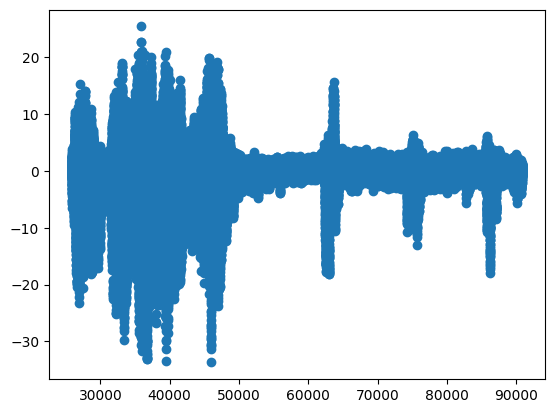

In [12]:
import matplotlib.pyplot as plt
plt.scatter((wt[232]['time_vector']),(wt[232]['angle_vector']))

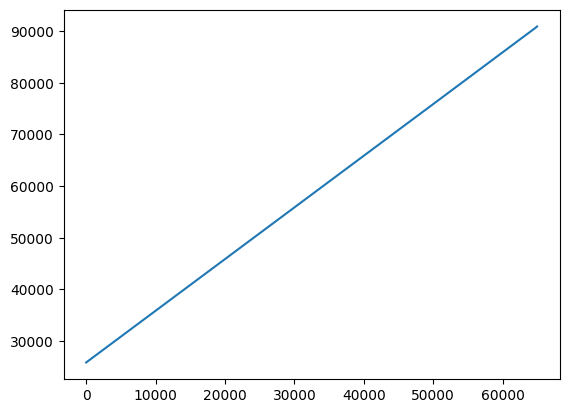

In [13]:
plt.plot(wt[232]['time_vector'])

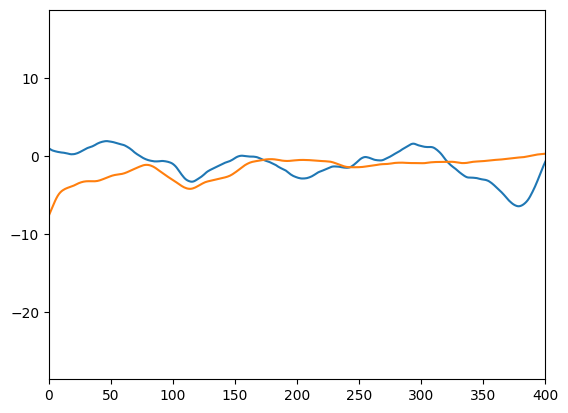

In [18]:
plt.plot(wt[232]['angle_vector_filtered'])
plt.plot(wt[232]['angle_vector_filtered'])
plt.xlim(0,400)
plt.show()

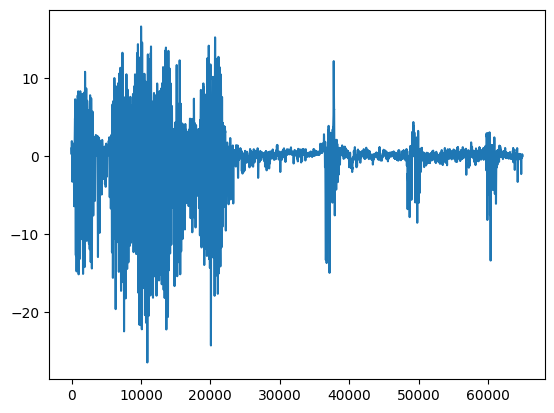

In [15]:
plt.plot(wt[232]['angle_vector_filtered'])

# CS

In [15]:
df['cs']

[array([245.28672   , 246.20193024, 247.36036096, 248.269632  ,
        249.03714048, 250.3282816 , 250.67148544, 251.3367168 ,
        251.95066624, 253.58505216, 255.3071744 , 255.50832896,
        255.83060224, 255.98510336, 256.2871424 , 256.97133824,
        258.66601728, 258.89826048, 259.0920832 , 260.06136064,
        260.8171136 , 261.15593472, 261.8521728 , 261.94564352,
        262.06606592, 263.01322496, 264.76844288, 265.627456  ,
        267.40954368, 267.96909824, 268.36616448, 268.86915328,
        269.12736512, 269.6786048 , 270.30594816, 271.62608896,
        271.88671744, 272.36316416, 272.99767552, 273.69264384,
        273.87733248, 274.69141248, 275.79901184, 275.84873728,
        276.84533504, 277.1288192 , 278.75009792, 278.81395456,
        279.45460992, 279.59084288, 279.61156864, 280.88083712,
        281.7867904 , 282.07666432, 282.39684864, 283.26282496,
        283.34249216, 285.684544  , 285.98772992, 287.0698112 ,
        287.21382656, 288.64967936, 288.

In [16]:
len(df['cs'])

233

In [17]:
df['cs'][232]

array([26.75064832, 27.9547904 , 28.9918976 , 29.07910144, 29.59454208,
       31.4640384 , 34.01977856, 35.95403264, 37.31931136, 38.6138112 ,
       40.58382336, 41.81987328, 42.58074624, 45.14963456, 46.45421056,
       47.5529216 , 48.59215872, 48.77664256, 50.04886016, 51.35126528,
       53.53242624, 54.65321472, 55.0385664 , 57.06133504, 58.5078784 ,
       59.6088832 , 60.83063808, 62.29889024, 63.17367296, 64.12771328,
       68.90090496, 70.14457344, 71.91691264, 73.08419072, 73.98547456,
       77.23737088, 79.72569088, 81.08023808, 86.34228736, 88.0945152 ,
       89.70395648, 89.88987392])

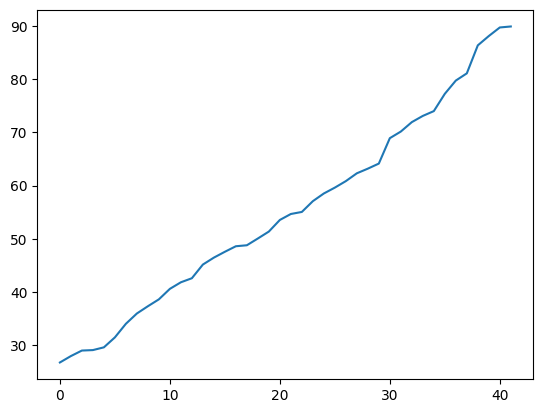

In [18]:
plt.plot(df['cs'][232])

# Name

In [19]:
df['name']

['210511_Block-3_Ch6_Epoc1of1.spd',
 '210511_Block-3_Ch19_Epoc1of1.spd',
 '210511_Block-3_Ch9_Epoc1of1.spd',
 '210511_Block-4_Ch19_Epoc1of1.spd',
 '210511_Block-4_Ch2_Epoc1of1.spd',
 '210511_Block-8_Ch13_Epoc1of1.spd',
 '210511_Block-7_Ch13_Epoc1of1.spd',
 '210514_Block-2_Ch19_Epoc1of1.spd',
 '210514_Block-3_Ch19_Epoc1of1.spd',
 '210514_Block-3_Ch2_Epoc1of1.spd',
 '210514_Block-5_Ch13_Epoc1of1.spd',
 '210601_Block-12_Ch22_Epoc1of1.spd',
 '210601_Block-14_Ch17_Epoc1of1.spd',
 '210601_Block-4_Ch23_Epoc1of1.spd',
 '210601_Block-4_Ch27_Epoc1of1.spd',
 '210601_Block-8_Ch22_Epoc1of1.spd',
 '210602_Block-4_Ch15_Epoc1of1.spd',
 '210602_Block-5_Ch15_Epoc1of1.spd',
 '210603_Block-6_Ch19_Epoc1of1.spd',
 '210603_Block-9_Ch19_Epoc1of1.spd',
 '210607_Block-1_Ch17_Epoc1of1.spd',
 '210607_Block-2_Ch17_Epoc1of1.spd',
 '210607_Block-6_Ch10_Epoc1of1.spd',
 '210608_pei_Block-3_Ch19_Epoc1of1.spd',
 '210611_Block-7_Ch24_Epoc1of1.spd',
 '210611_Block-4_Ch15_Epoc1of1.spd',
 '210611_Block-4_Ch17_Epoc1of1-1.spd

In [20]:
len(df['name'])

233

In [21]:
df['name'][232]

'151215_Block-5_Ch20_Epoc1of1.spd'

# SS

In [22]:
df['ss']

[array([245.04739072, 245.07376896, 245.08044544, ..., 469.97964032,
        469.98902016, 469.99741696]),
 array([400.02719744, 400.03776512, 400.04780032, ..., 649.93234944,
        649.97122048, 649.97941248]),
 array([ 20.00679936,  20.04661248,  20.06438912, ..., 279.97492224,
        279.98618624, 279.99118336]),
 array([ 13.2528128 ,  13.27321088,  13.2911104 , ..., 269.9485184 ,
        269.96002816, 269.98095872]),
 array([220.01916928, 220.0253952 , 220.05484544, ..., 445.7801216 ,
        445.78655232, 445.8089984 ]),
 array([ 28.18830336,  28.20112384,  28.21353472, ..., 229.96996096,
        229.9879424 , 229.99547904]),
 array([612.00909312, 612.02322432, 612.03067904, ..., 802.8133888 ,
        802.82235904, 802.8371456 ]),
 array([750.00905216, 750.01630208, 750.0241664 , ..., 969.96519424,
        969.97563904, 969.9894016 ]),
 array([150.02080768, 150.03448832, 150.04333568, ..., 449.96511232,
        449.9771136 , 449.99190016]),
 array([200.00974848, 200.02179072, 2

In [23]:
len(df['ss'])

233

In [24]:
df['ss'][232]

array([26.64771584, 26.65476096, 26.66717184, ..., 90.35399168,
       90.39015936, 90.40478208])

In [25]:
len(df['ss'][232])

3437

In [26]:
x = [*range(0, 3437, 1)]

In [27]:
len(x)

3437

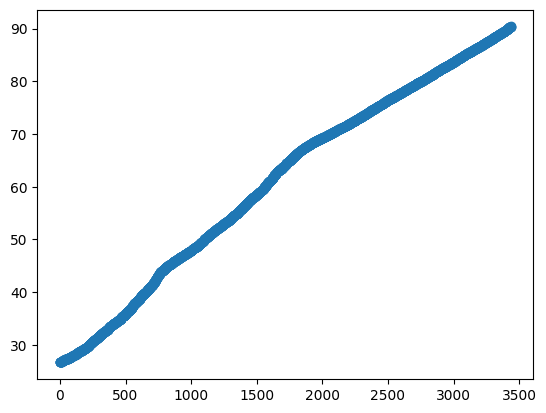

In [28]:
plt.scatter(x,df['ss'][232])

In [29]:
import numpy as np
np.mean(df['ss'][232])

61.03420817168462

### Visualising averages 

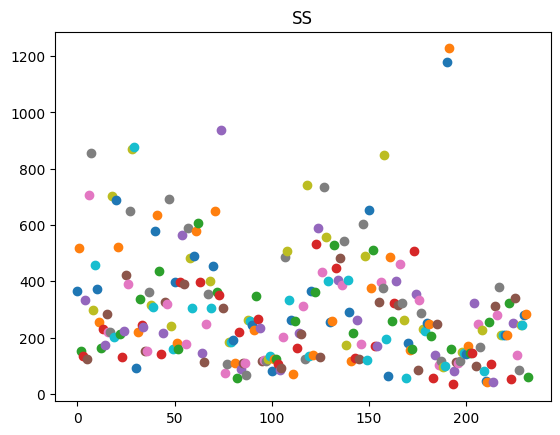

In [30]:
i=0
while i<233: 
    a=np.mean(df['ss'][i])
    plt.scatter(i,a)
    i=i+1
plt.title('SS')
plt.show()

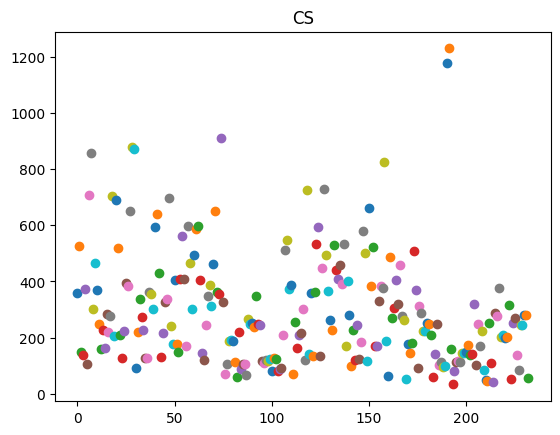

In [34]:
data= mat73.loadmat('233_Purkinje_cells_Vincenzo_Romano.mat')
df=data['data']
i=0
while i<233: 
    d=np.mean(df['cs'][i])
    plt.scatter(i,d)
    i=i+1
plt.title('CS')
plt.show()


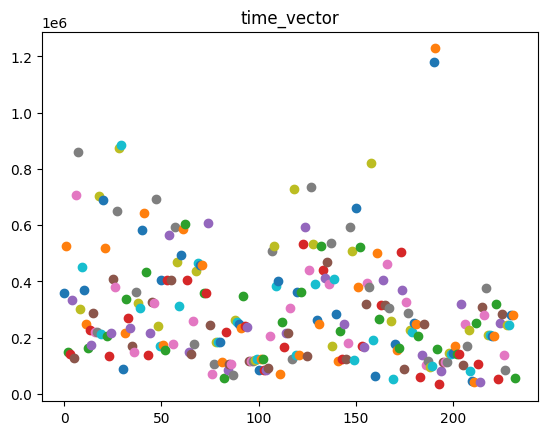

In [35]:
data= mat73.loadmat('233_Purkinje_cells_Vincenzo_Romano.mat')
df=data['data']
wt=df['combined_unique_whisker_tracks1']
i=0
while i<233: 
    c=np.mean(wt[i]['time_vector'])
    plt.scatter(i,c)
    i=i+1
plt.title('time_vector')
plt.show()

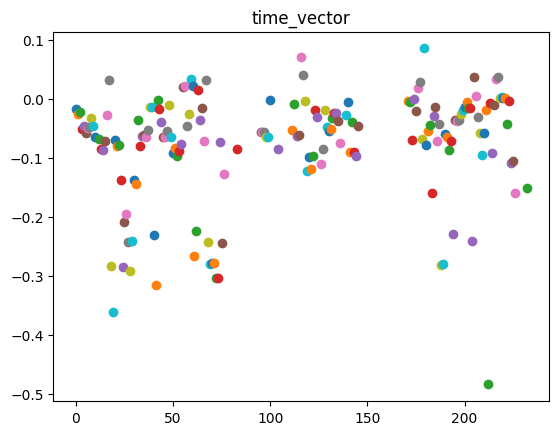

In [33]:
i=0
while i<233: 
    b=np.mean(wt[i]['angle_vector'])
    plt.scatter(i,b)
    i=i+1
plt.title('time_vector')
plt.show()

In [36]:
def maxDiff(a):
    vmin = a[0]
    dmax = 0
    for i in range(len(a)):
        if (a[i] < vmin):
            vmin = a[i]
        elif (a[i] - vmin > dmax):
            dmax = a[i] - vmin
    return dmax

In [37]:
maxDiff(df['ss'][0])

224.95002623999997

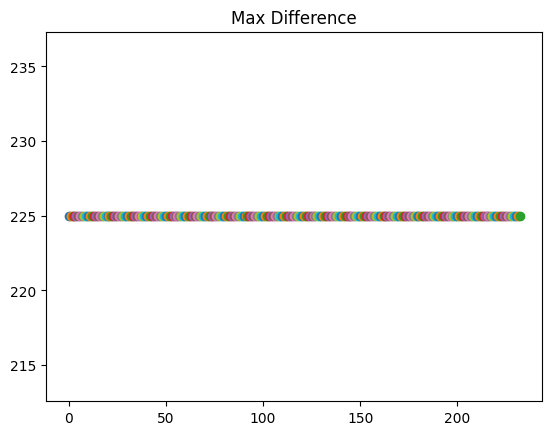

In [40]:
i=0
while i<233: 
    plt.scatter(i,maxDiff(df['ss'][0]))
    i=i+1
plt.title('Max Difference')
plt.show()

In [42]:
lis=[5,0,8]
maxDiff(lis)

8